**Predicting House Prices with Linear Regression Model**

---

In [25]:
# install / import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns

In [ ]:
# importing the boston housing dataset

# this uses the 'Boston House Price' dataset (Harrison, D. and Rubinfeld D.L.).
# in this dataset, each row describes a Boston town or suburb.
# there are 506 rows and 13 attributes (features) with a target column (price).

from sklearn.datasets import load_boston
boston_dataset = load_boston()

In [27]:
# create a dataframe using 'boston_dataset'

boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

In [28]:
# adding target variable to dataframe

boston['PRICE'] = boston_dataset.target

In [29]:
# preview the data

boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


**Data Description** (*boston_dataset.DESCR*)

Attribute Information (in order):
- CRIM: per capita crime rate by town
- ZN:   proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS    proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NOX:  nitric oxides concentration (parts per 10 million)
- RM:   average number of rooms per dwelling
- AGE:  proportion of owner-occupied units built prior to 1940
- DIS:  weighted distances to five Boston employment centres
- RAD:  index of accessibility to radial highways
- TAX:  full-value property-tax rate per *10*,000 dollars
- PTRATIO  pupil-teacher ratio by town
- B: ="1000(Bk - 0.63)^2" where Bk is the proportion of black people by town
- LSTAT: % lower status of the population
- MEDV (PRICE): Median value of owner-occupied homes in $1000's

In [30]:
# get the number of rows and columns

boston.shape

(506, 14)

In [31]:
# check for null values

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


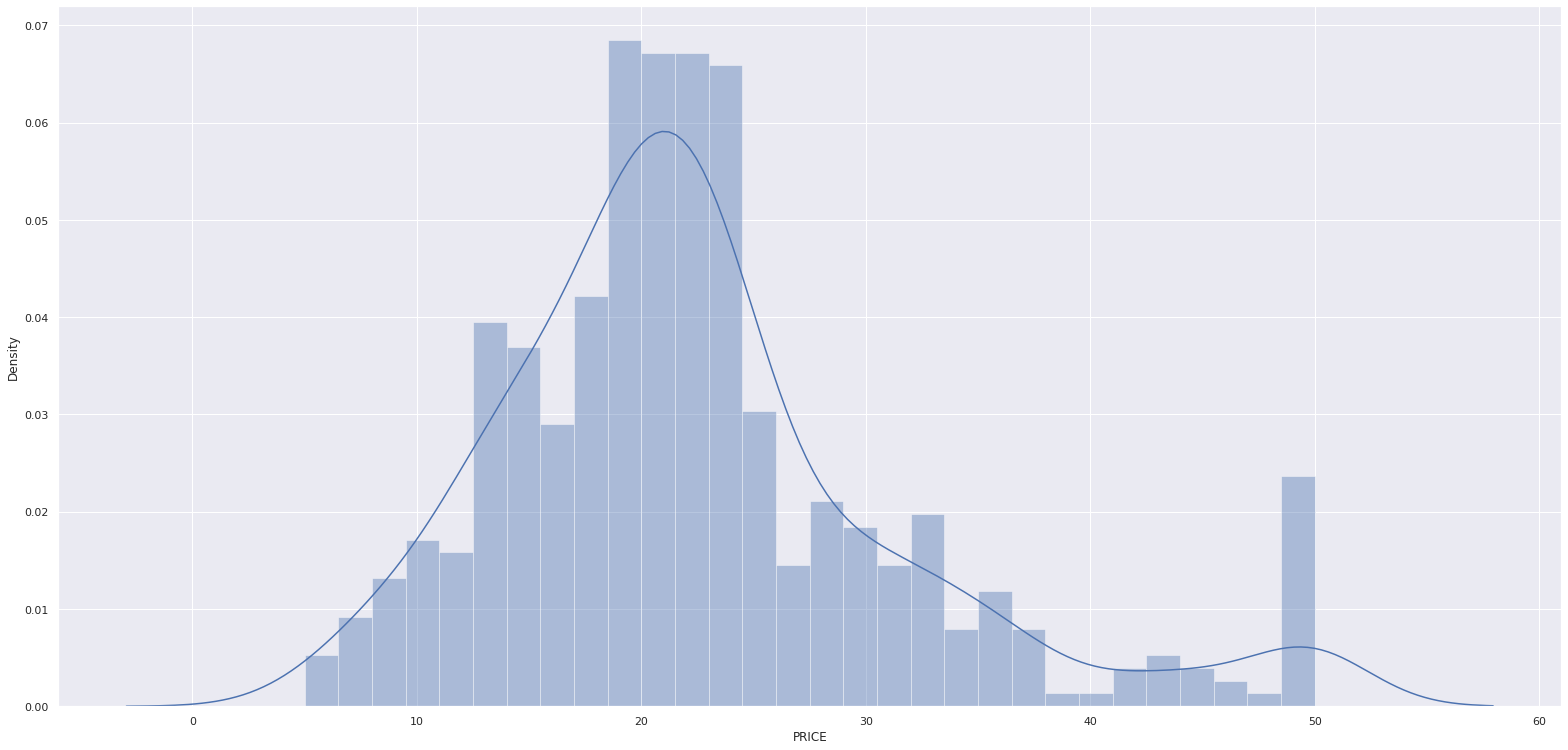

In [97]:
# plot the distribution of the target variable 'PRICE'

sns.set(rc={'figure.figsize':(24,12)})
sns.distplot(boston['PRICE'], bins=30)
plt.show()

In [33]:
# calculate the correlation matrix

corr = boston.corr()

In [34]:
# generate a mask for the upper triangle

mask = np.triu(np.ones_like(corr))


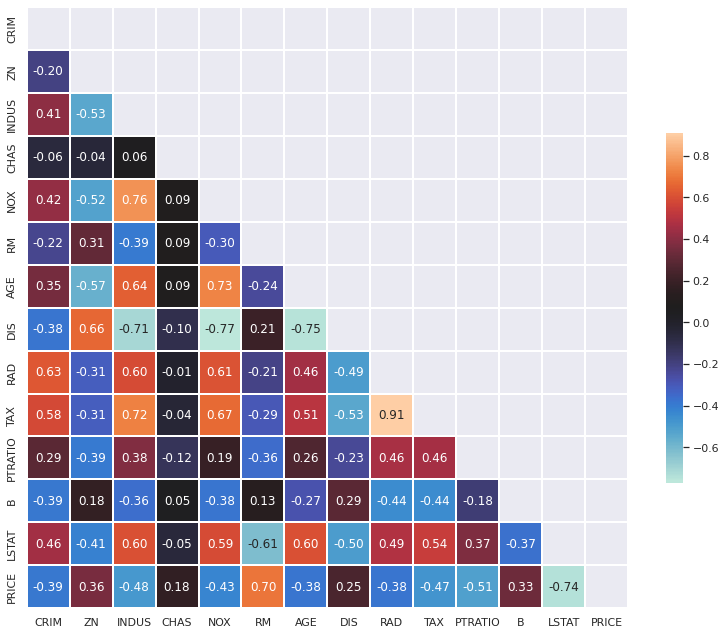

In [35]:
# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12,12))

# draw the heatmap with 'sns.heatmap()'
sns.heatmap(corr, annot=True, mask=mask, linewidths=1, square=True, fmt=".2f", center=0.08, cbar_kws={"shrink":0.5})

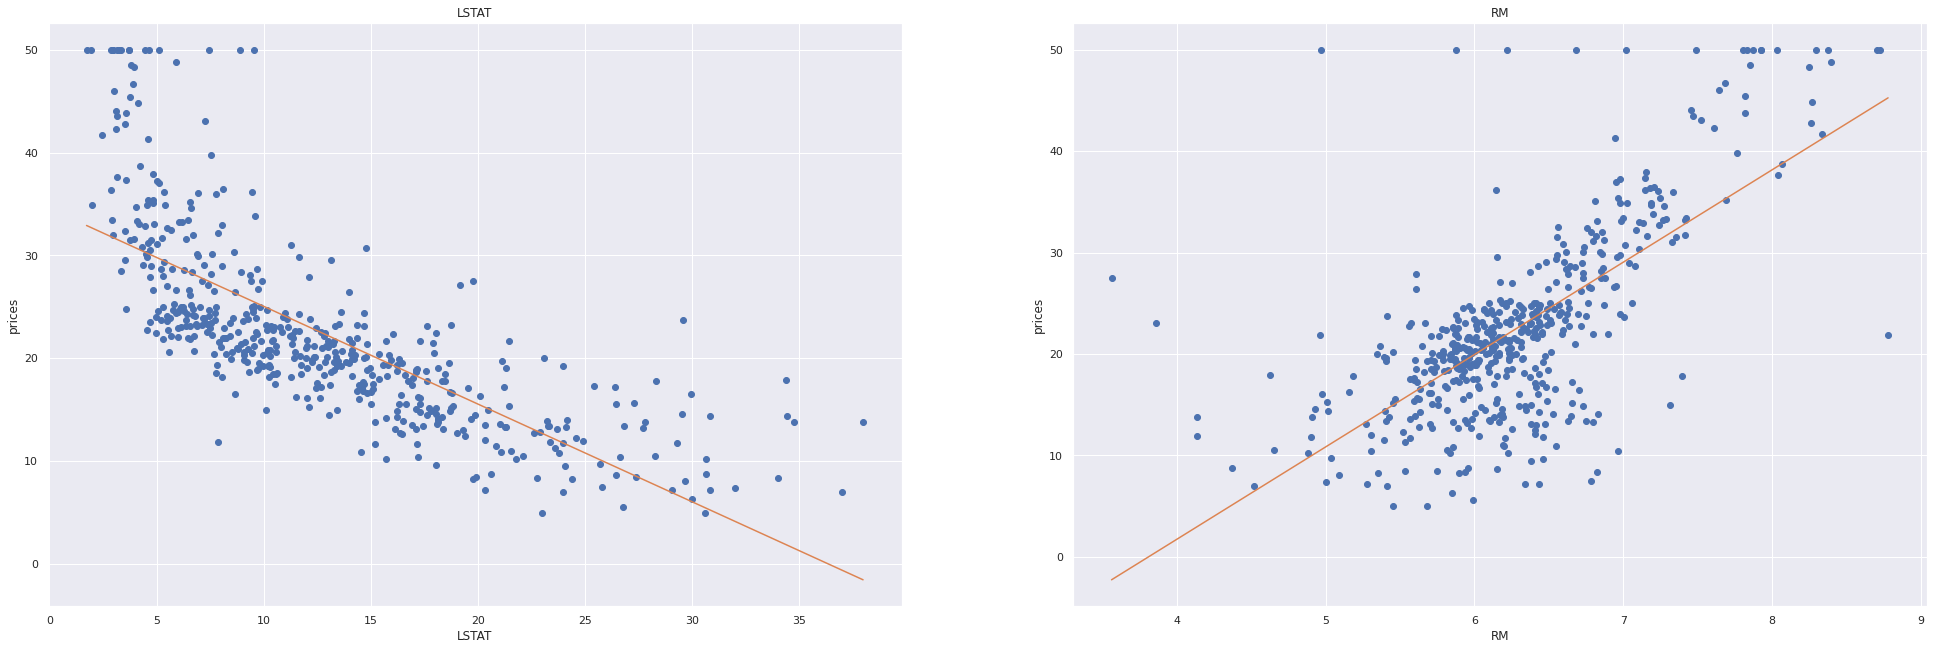

In [36]:
# 'PRICE' scatter graphs

# RM has a strong positive correlation with 'PRICE' (0.70)
# LSTAT has a high negative correlation with 'PRICE' (-0.74)

features = ['LSTAT', 'RM']
target = boston['PRICE']

plt.figure(figsize=(30, 10))

# i: index
for i, col in enumerate(features):

    # number of plots
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.plot(x, y, 'o')

    # create regression line
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

In [50]:
# split dataset to x and y variables

X = boston.drop(['PRICE'], axis = 1)
Y = boston['PRICE']

In [51]:
# import library to create Polynomial Features and StandardScaler

from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)

In [52]:
# create Polynomial Features

pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [53]:
# see the difference in data dimension

X.shape, X_pf.shape

((506, 13), (506, 104))

In [54]:
# import library for data split

from sklearn.model_selection import train_test_split

In [82]:
# perform 70/30 data split

X_train, X_test, Y_train, Y_test = train_test_split(X_pf, Y, test_size=0.3, random_state=11235)

In [83]:
# see the data dimension

X_train.shape, Y_train.shape

((354, 104), (354,))

In [84]:
X_test.shape, Y_test.shape

((152, 104), (152,))

In [85]:
# Fit StandardScaler on X_train as before

s = StandardScaler()

X_train_s = s.fit_transform(X_train)

In [86]:
# StandardScaler transform on X_test using 'X_train' fit

X_test_s = s.transform(X_test)

In [87]:
# import library for linear regression

from sklearn.linear_model import LinearRegression

In [88]:
# defines the regression model

model = LinearRegression()

In [89]:
# train the model using the training sets 

model.fit(X_train_s,Y_train)

LinearRegression()

In [90]:
# apply trained model to make prediction (on test set)

Y_pred = model.predict(X_test_s)

In [91]:
# import library for model evaluation

from sklearn.metrics import mean_squared_error, r2_score

In [94]:
# print model performance

# print('Coefficients:', model.coef_)
# print('Intercept:', model.intercept_.round(2))
print('Mean Absolute Error (MAE):',
      np.mean(np.abs(Y_test - Y_pred)).round(2), '(' + str(np.mean((np.abs(((Y_pred-Y_test)/Y_test))*100)).round()) + '%)')
print('Mean Squared Error (MSE): %.2f'
      % mean_squared_error(Y_pred, Y_test))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y_pred, Y_test))

Mean Absolute Error (MAE): 2.38 (13.0%)
Mean Squared Error (MSE): 10.00
Coefficient of determination (R^2): 0.87


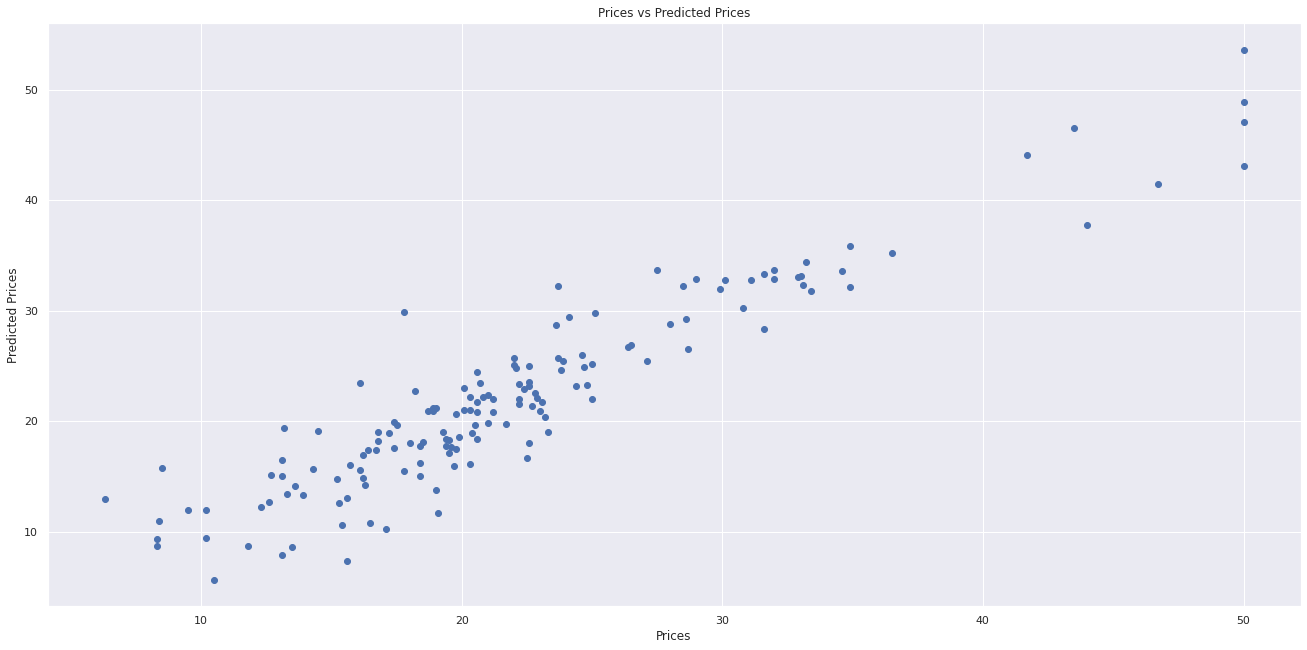

In [95]:
# visualizing the differences between actual prices and predicted values

plt.figure(figsize=(20, 10))
plt.scatter(Y_test, Y_pred)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Prices vs Predicted Prices")
plt.show()

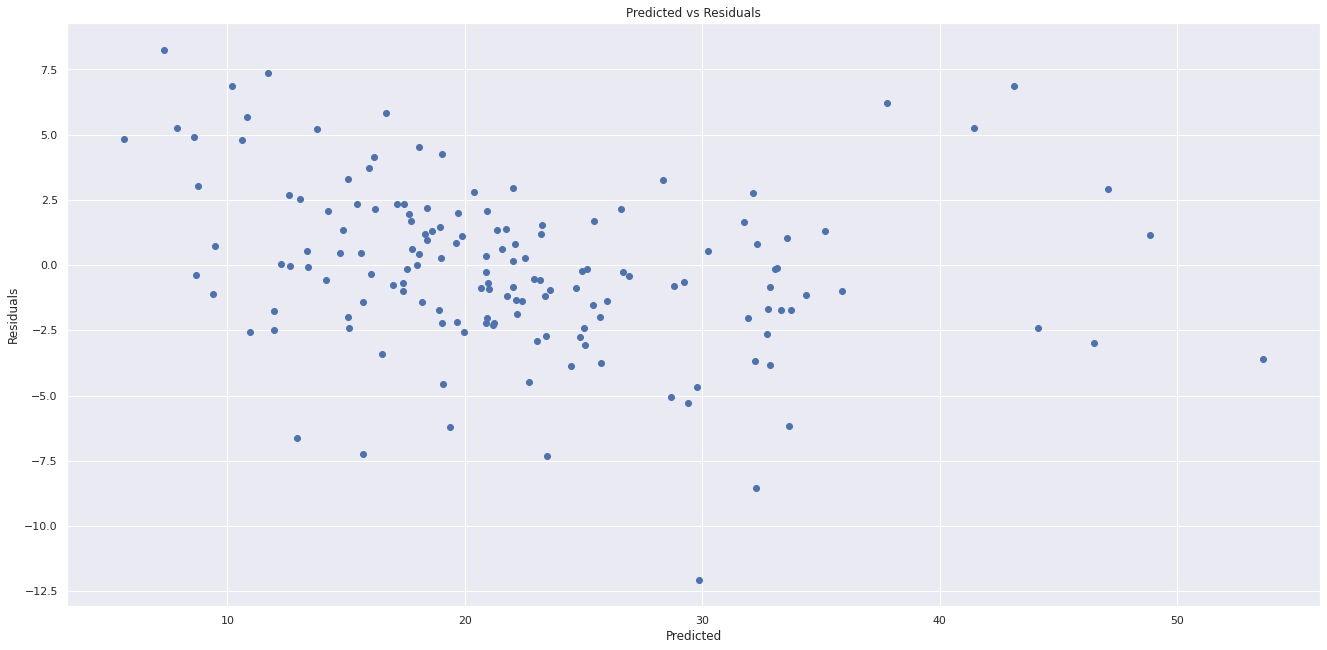

In [96]:
# inspecting the residuals

plt.figure(figsize=(20, 10))
plt.scatter(Y_pred,Y_test-Y_pred)
plt.title("Predicted vs Residuals")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()